## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape

(294478, 5)

In [5]:
df.shape[0]

294478

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [7]:
len(df['user_id'].unique())


290584

d. The proportion of users converted.

In [8]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [13]:
Numtime = len(df.query('group == "treatment" and landing_page != "new_page"')) + \
len(df.query('group != "treatment" and landing_page == "new_page"'))
Numtime

3893

f. Do any of the rows have missing values?

In [14]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [22]:
df2 = df.drop(df[((df.group == 'control') & (df.landing_page == 'new_page')) | \
                 ((df.group == 'treatment') & (df.landing_page == 'old_page'))].index)


In [23]:
df2.shape

(290585, 5)

In [24]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [25]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [29]:
duplicate_user = df2[df2['user_id'].duplicated()].user_id
duplicate_user

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [30]:
df2[df2['user_id'] == duplicate_user.iloc[0]]


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [31]:
df2.drop_duplicates(['user_id'], inplace=True)

In [32]:
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [33]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [34]:
df2.groupby(["group", "converted"]).size()[1] / df2.group.value_counts()[1]


0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [38]:
df2.groupby(["group", "converted"]).size()[3] / df2.group.value_counts()[1]


0.1188375070556328

d. What is the probability that an individual received the new page?

In [39]:
len(df2.query('landing_page == "new_page"'))/len(df2.landing_page)


0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions. 

Answer:


The number of users here is a very large number, which is approximately 290,584 users, by examining the User ID function
Approximately, the total number of page conversion is approximately 11.9%, regardless of the type of page or what is the result of the conversion
The conversion rate of old pages is approximately 12.03% .

And the pages that led to the transition to the New_pages for treatment accounted for approximately 11.88%, i.e. approximately 12%, which is considered a very close percentage between the conversion to the old_pages or the New_pages, the difference between them is approximately 0.5%


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

** answer :** <br>
1- A null hypothesis is a statement, in which there is no relationship between two variables also if p-value is less than 5%, the old_page has a higher chance to converting users.<br>
2- An alternative hypothesis is statement in which there is some statistical significance between two measured phenomeno and , if p-value is equal to or greater than 5%, then the new page has a higher chance to converting users.<br> 
<center> 
𝐻0:𝑝𝑛𝑒𝑤−𝑝𝑜𝑙𝑑≤0
  </center>
  <center> 
𝐻1:𝑝𝑛𝑒𝑤−𝑝𝑜𝑙𝑑>0
    </center> 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [40]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [41]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [42]:
n_new = df2.landing_page.value_counts()[0]
n_new

145310

d. What is $n_{old}$?

In [43]:
n_old = df2[df2['landing_page'] == 'old_page']['landing_page'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [45]:
new_page = np.random.binomial(1,p_new,n_new)
new_page.mean()

0.1195168949143211

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [46]:
old_page = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
old_page.mean()

0.8789184575354159

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [48]:
new_page.mean() - old_page.mean()

-0.7594015626210948

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [49]:
p_diffs = []

for _ in range(10000):
    new_page = np.random.binomial(1,p_new,n_new).mean()
    old_page = np.random.binomial(1,p_old,n_old).mean()
    p_diffs.append(new_page - old_page )

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

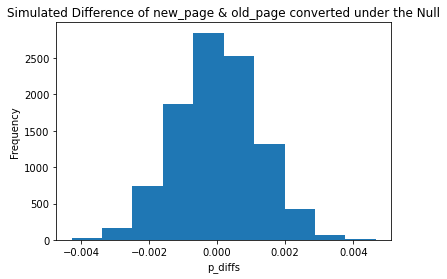

In [61]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Simulated Difference of new_page & old_page converted under the Null');
plt.show()

Text(0, 0.5, 'Frequency')

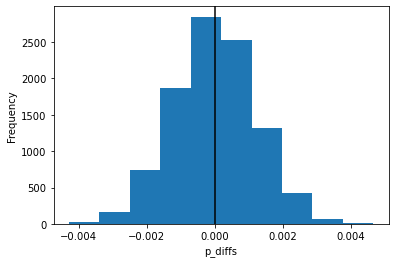

In [75]:
plt.hist(p_diffs);
plt.axvline(x=0, color='black');
plt.xlabel('p_diffs')
plt.ylabel('Frequency')

distribution for the conversion difference by bootstrapping

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [63]:
df_control = df2.query('group == "control"')
df_treatment = df2.query('group == "treatment"')

# display observed difference
obs_diff = df_treatment.converted.mean() - df_control.converted.mean()
obs_diff


-0.0015782389853555567

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**


Use a sample size for each page equal to the ones in ab_data.csv.
Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null.
Our value has exceeded the critical value of 0.05 and in this case we have already mentioned that we cannot prove that the new page diverts users more than the old page because the specified critical value is exceeded

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [66]:
import statsmodels.api as sm

convert_old = df2.query('(converted == 1) and (group == "control")').count()
convert_new = df2.query('(converted == 1) and (group == "treatment")').count()
n_old = df2.query('group == "control"').count()
n_new = df2.query('group == "treatment"').count()
convert_old, convert_new, n_old, n_new

(user_id         17489
 timestamp       17489
 group           17489
 landing_page    17489
 converted       17489
 dtype: int64,
 user_id         17264
 timestamp       17264
 group           17264
 landing_page    17264
 converted       17264
 dtype: int64,
 user_id         145274
 timestamp       145274
 group           145274
 landing_page    145274
 converted       145274
 dtype: int64,
 user_id         145310
 timestamp       145310
 group           145310
 landing_page    145310
 converted       145310
 dtype: int64)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [69]:
z_score, p_value = sm.stats.proportions_ztest(counts, nobs, alternative='larger')
p_value

0.9050583127590245

In [70]:
z_score

-1.3109241984234394

In [72]:
from scipy.stats import norm
critical_value = norm.ppf(1 - (0.05))
critical_value

1.6448536269514722

In [74]:
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**answer .** <br> 
It is considered a z-score and the p_value percentage, p_value is 0.91 and 0.05 significance level which is higher than the percentage of importance that we were comparing with,  and this means that we cannot trust or be confident with a high percentage that the conversion rate of the new page is greater and higher than the rate of the old page

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**answer .**
<br> 
When using the variable that carries two types of variables, which is when the user uses one of the pages and when the probability of converting the page or the probability of not converting the page and this pattern must use logistic regression, because of the probability of converting the page and receiving it to the user. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [78]:
df2[['control','treatment']]= pd.get_dummies(df2['group'])
df2 = df2.drop('control',axis = 1)
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,treatment,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


In [82]:
df3 = df2.rename(columns={'treatment': 'ab_page'})
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [83]:
from scipy import stats
stats.chisqprob = lambda chisq, df3: stats.chi2.sf(chisq, df3)

df3['intercept'] = 1

lm = sm.Logit(df3['converted'],df3[['intercept','ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:               8.077e-06
Time:                        20:57:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

Through the assumptions and possibilities used, it became clear that the percentage of assumptions and the probability of turning the old page is higher than the rate of turning the new page, with a difference between the transformation between the old page and the new page, which supports the height of the old page by 0.5 %

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**answer .**
<br> 
Alternative hypothesis from part II: the conversion rate of the old_page is higher than the conversion rate of the new_page

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**answer here.**
<br> 
It is good to put other possibilities and to impose other hypotheses to determine many possibilities that help expand the answer and that there are possibilities that help in proving the hypotheses, which may be the reason for the expansion and finding many solutions
One of the disadvantages that may accompany us is that there is a complexity and an expansion in more complex ways, due to the large number of analyzes. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [99]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')


In [100]:
### Create the necessary dummy variables

df_new.head()

,country,timestamp,group,landing_page,converted,treatment,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [102]:
### Fit Your Linear Model And Obtain the Results
df_new[['CA','UK', 'US']] = pd.get_dummies(df_new['country'])
# drop the country column since this is not necessary
df_new = df_new.drop('country', 1)
df_new.head()

,timestamp,group,landing_page,converted,treatment,intercept,CA,UK,US
user_id,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


<a id='conclusions'></a>
## Conclusions

The conclusions showed that the hypotheses and probabilities may lead to inferred results and may help organizations to follow any of them in making a decision. Old pages are converted higher than new pages because of the type and performance of the page, and the performance of the new page must be developed to help users benefit

